In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
gpp_data = xr.open_dataset("./gpp_Lmon_CanESM5_1pctCO2_r1i1p1f1_gn_185001-200012.nc")["gpp"]
cveg_data = xr.open_dataset("./cVeg_Lmon_CanESM5_1pctCO2_r1i1p1f1_gn_185001-200012.nc")["cVeg"]
ts_data = xr.open_dataset("./ts_Amon_CanESM5_1pctCO2_r1i1p1f1_gn_185001-200012.nc")["ts"]
hurs_data = xr.open_dataset("./hurs_Amon_CanESM5_1pctCO2_r1i1p1f1_gn_185001-200012.nc")["hurs"]
pr_data = xr.open_dataset("./pr_Amon_CanESM5_1pctCO2_r1i1p1f1_gn_185001-200012.nc")["pr"]

In [3]:
start_x = 12*(1960-1850)
end_x = 12*(1980-1850)
start_y = 12*(1980-1850)
end_y = 12*(2000-1850)

def avg20(ds):
    return np.mean(ds.to_numpy(), axis=0) # axis of mean = time

In [4]:
x_cveg = avg20(cveg_data[start_x:end_x,:,:])
x_ts = avg20(ts_data[start_x:end_x,:,:])
x_pr = avg20(pr_data[start_x:end_x,:,:])
y_cveg = avg20(cveg_data[start_y:end_y,:,:])

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
model = LinearRegression()
inputs = np.array([x_cveg.flatten(), x_ts.flatten(), x_pr.flatten()]).transpose()
model.fit(inputs, y_cveg.flatten())
print("*", model.coef_, "+", model.intercept_, "    R^2", model.score(inputs, y_cveg.flatten()))

* [ 1.1355630e+00 -1.8724469e-03  1.1820613e+03] + 0.5058911     R^2 0.9969119847409713


In [7]:
null_model = LinearRegression()
null_inputs = np.array([x_cveg.flatten()]).transpose()
null_model.fit(null_inputs, y_cveg.flatten())
print("*", null_model.coef_, "+", null_model.intercept_, "    R^2", null_model.score(null_inputs, y_cveg.flatten()))

* [1.1360791] + 0.008861542     R^2 0.9968879288520699


Text(0.5, 1.0, '1960-1980 average cVeg')

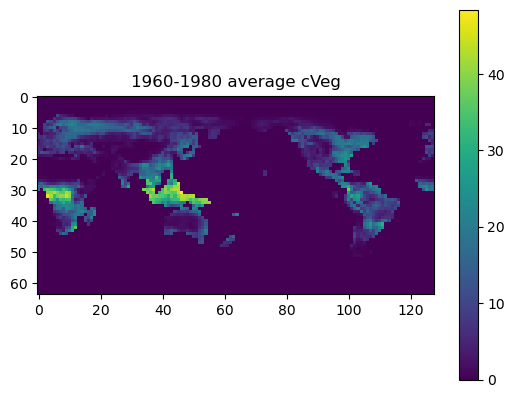

In [8]:
plt.imshow(x_cveg[::-1])
plt.colorbar()
plt.title("1960-1980 average cVeg")

Text(0.5, 1.0, '1980-2000 average cVeg')

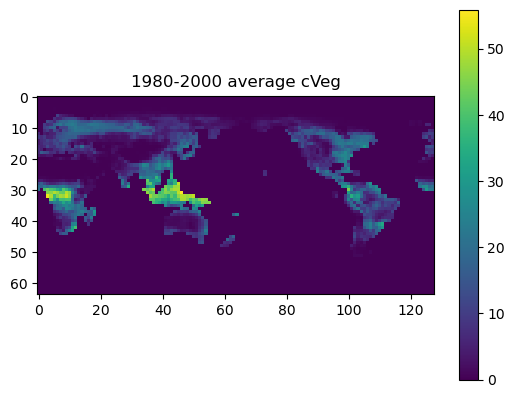

In [9]:
plt.imshow(y_cveg[::-1])
plt.colorbar()
plt.title("1980-2000 average cVeg")

Text(0.5, 1.0, 'Predicted cVeg')

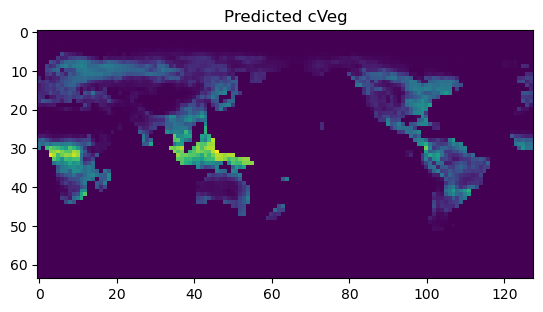

In [10]:
plt.imshow(model.predict(inputs).reshape((64,128))[::-1])
plt.title("Predicted cVeg")

Text(0.5, 1.0, '1980-2020 vs Predicted')

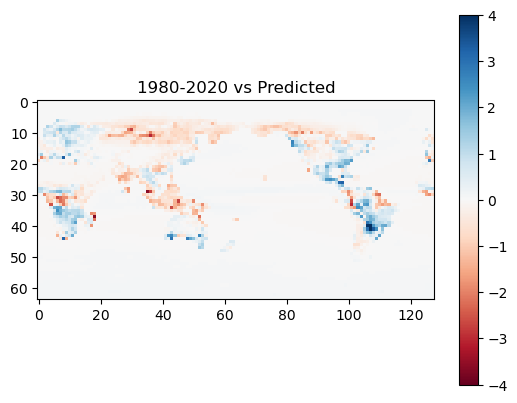

In [11]:
plt.imshow((model.predict(inputs).reshape((64,128))-y_cveg)[::-1], cmap="RdBu", vmin=-4,vmax=4)
plt.colorbar()
plt.title("1980-2020 vs Predicted")

Text(0.5, 1.0, '1960-1980 vs 1980-2000')

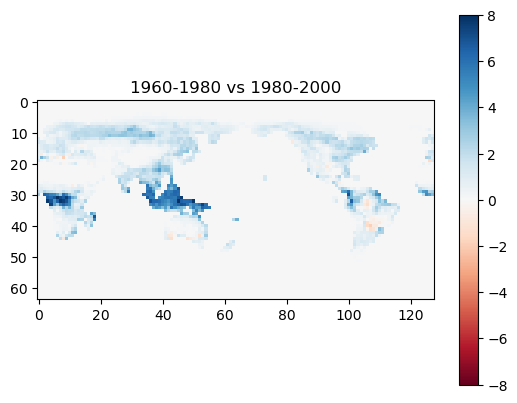

In [12]:
diff = (y_cveg-x_cveg)[::-1]

plt.imshow(diff, cmap="RdBu", vmin=-8, vmax=8)
plt.colorbar()
plt.title("1960-1980 vs 1980-2000")

In [13]:
gpp_data.lat.to_numpy()

array([-87.86379884, -85.09652699, -82.31291295, -79.52560657,
       -76.73689968, -73.94751515, -71.15775201, -68.36775611,
       -65.57760701, -62.7873518 , -59.99702011, -57.20663153,
       -54.41619953, -51.62573367, -48.83524097, -46.04472663,
       -43.25419467, -40.46364818, -37.67308963, -34.88252099,
       -32.09194388, -29.30135962, -26.51076933, -23.72017393,
       -20.92957425, -18.13897099, -15.34836476, -12.55775612,
        -9.76714556,  -6.97653355,  -4.18592053,  -1.39530691,
         1.39530691,   4.18592053,   6.97653355,   9.76714556,
        12.55775612,  15.34836476,  18.13897099,  20.92957425,
        23.72017393,  26.51076933,  29.30135962,  32.09194388,
        34.88252099,  37.67308963,  40.46364818,  43.25419467,
        46.04472663,  48.83524097,  51.62573367,  54.41619953,
        57.20663153,  59.99702011,  62.7873518 ,  65.57760701,
        68.36775611,  71.15775201,  73.94751515,  76.73689968,
        79.52560657,  82.31291295,  85.09652699,  87.86

In [14]:
len([-87.863799, -85.096527, -82.312913, -79.525607, -76.7369  , -73.947515,
       -71.157752, -68.367756, -65.577607, -62.787352, -59.99702 , -57.206632,
       -54.4162  , -51.625734, -48.835241, -46.044727, -43.254195, -40.463648,
       -37.67309 , -34.882521, -32.091944, -29.30136 , -26.510769, -23.720174,
       -20.929574, -18.138971, -15.348365, -12.557756,  -9.767146,  -6.976534,
        -4.185921,  -1.395307,   1.395307,   4.185921,   6.976534,   9.767146,
        12.557756,  15.348365,  18.138971,  20.929574,  23.720174,  26.510769,
        29.30136 ,  32.091944,  34.882521,  37.67309 ,  40.463648,  43.254195,
        46.044727,  48.835241,  51.625734,  54.4162  ,  57.206632,  59.99702 ,
        62.787352,  65.577607,  68.367756,  71.157752,  73.947515,  76.7369  ,
        79.525607,  82.312913,  85.096527,  87.863799])

64

In [15]:
# Choose r to make sphere surface area 1 for easy multiplication later
# r = sqrt(1/4pi)
r = np.sqrt(1/(4*np.pi))

# Gets height of section of sphere given two angles
def getH(angles):
    angle_min = np.min(angles)
    angle_max = np.max(angles)
    
    # Hypotenuse = r
    # Hypotenuse * sin(Theta) = Opposite
    h_min = r * np.sin(angle_min)
    h_max = r * np.sin(angle_max)
    return h_max - h_min

# https://en.wikipedia.org/wiki/Spherical_segment
def getArea(horizontal_angles,vertical_angles,in_degrees=True):
    if in_degrees: # We need radians
        horizontal_angles *= (np.pi / 180)
        vertical_angles *= (np.pi / 180)

    left_bound = np.min(horizontal_angles)
    right_bound = np.max(horizontal_angles)
    arc_horz = right_bound - left_bound

    # 2 * pi * r * h * arc2
    return 2 * np.pi * r * getH(vertical_angles) * (arc_horz/(2*np.pi))

# should theoretically equal 1
getArea(np.array([-180,180], dtype=np.float64),np.array([90,-90], dtype=np.float64))

0.9999999999999999

In [16]:
def cuts(amount_vertical,amount_horizontal,vstart=90):
    space = np.linspace(-vstart,vstart,amount_vertical+1)
    width = 360/amount_horizontal
    y = []
    # We only care about vertical dimension
    for i in range(amount_vertical):
        y.append(getArea(np.array([0,width], dtype=np.float64), np.array([space[i],space[i+1]], dtype=np.float64)))
    x = np.array([y] * amount_horizontal)
    return x.transpose()

#cuts(10,5) # This may be in the wrong orientation but we can always transpose    

In [17]:
weights = cuts(64,128,vstart=90)
gpp_data[0].to_numpy().shape

np.sum(ts_data[0].to_numpy() * weights)

#np.sum(weights * gpp_data[0].to_numpy())

285.3834385799538

In [42]:
def timeseries(datamap,colors="rgb",combined=False):
    i = 0
    yearlys = []
    for name, filepath in datamap.items():
        dataset = xr.open_dataset(filepath)
        varname = filepath.split("/")[-1].split("_")[0] #.lower()
        values = dataset[varname].to_numpy()
        weights = cuts(values.shape[1],values.shape[2])

        plt.figure(figsize=(12,4))
        
        values = np.nan_to_num(values)
        monthly = np.sum(values * weights, axis=(1,2))
        yearly = np.mean(monthly.reshape(-1, 12), axis=1)
        yearly_time = dataset["time"][0::12]
        yearlys.append(yearly)
        
        if not combined:
            plt.plot(yearly, color=colors[i%len(colors)])
            plt.title(name)
        i += 1
    if combined:
        plt.plot(np.array(yearlys).transpose())
        plt.legend(datamap.keys())



In [ ]:
timeseries({
    "1pctCO2 gpp":"./gpp_Lmon_CanESM5_1pctCO2_r1i1p1f1_gn_185001-200012.nc",
    "1pctCO2 ts":"./ts_Amon_CanESM5_1pctCO2_r1i1p1f1_gn_185001-200012.nc",
    "1pctCO2 cveg":"./cVeg_Lmon_CanESM5_1pctCO2_r1i1p1f1_gn_185001-200012.nc",
    "1pctCO2 hurs":"./hurs_Amon_CanESM5_1pctCO2_r1i1p1f1_gn_185001-200012.nc",
    "1pctCO2 pr":"./pr_Amon_CanESM5_1pctCO2_r1i1p1f1_gn_185001-200012.nc",
})

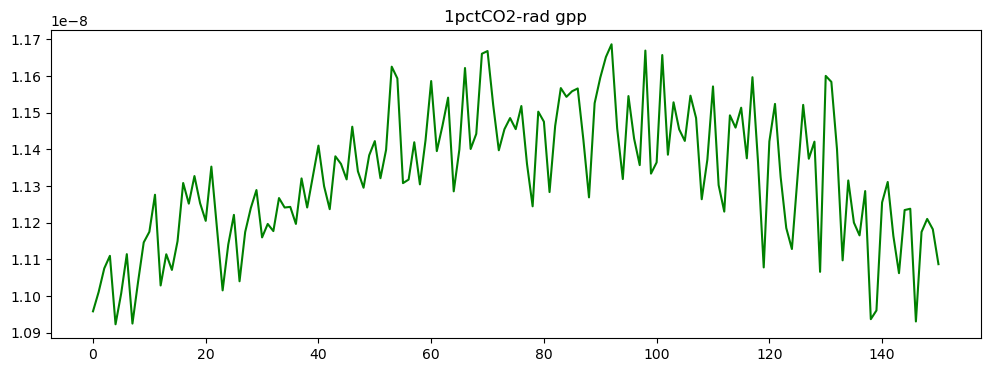

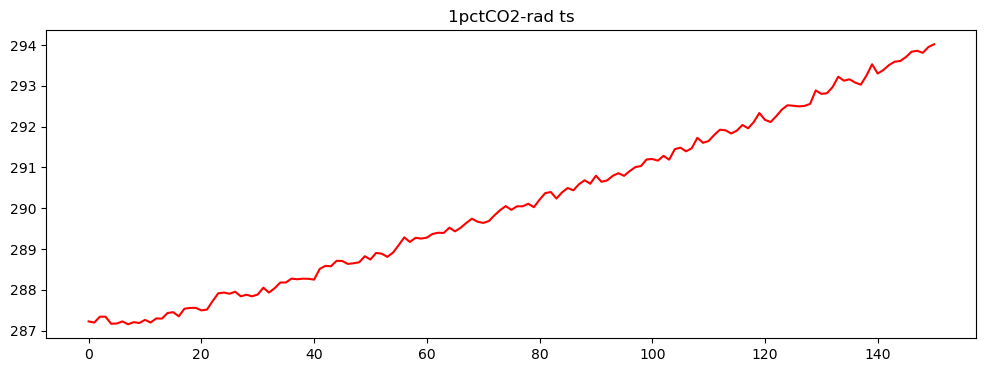

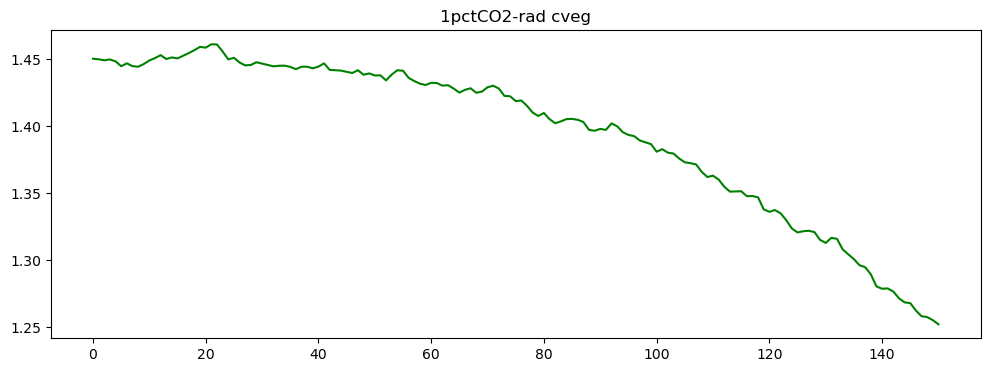

In [19]:
timeseries({
    "1pctCO2-rad gpp":"./gpp_Lmon_CanESM5_1pctCO2-rad_r1i1p1f1_gn_185001-200012.nc",
    "1pctCO2-rad ts":"./ts_Amon_CanESM5_1pctCO2-rad_r1i1p1f1_gn_185001-200012.nc",
    "1pctCO2-rad cveg":"./cVeg_Lmon_CanESM5_1pctCO2-rad_r1i1p1f1_gn_185001-200012.nc",
})

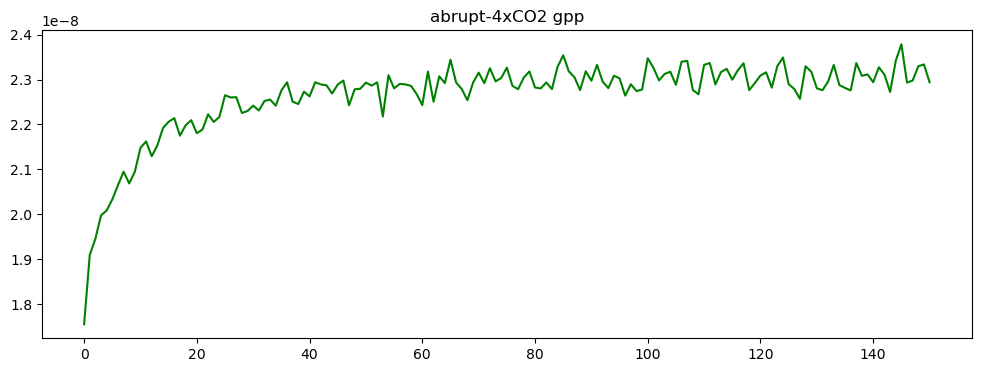

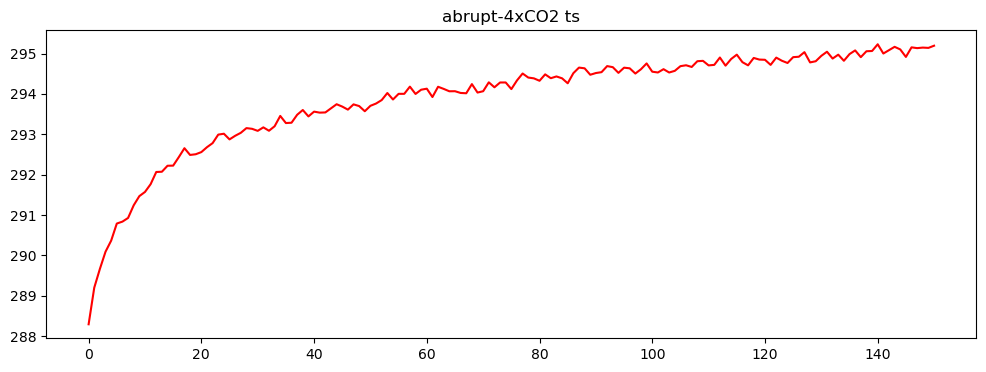

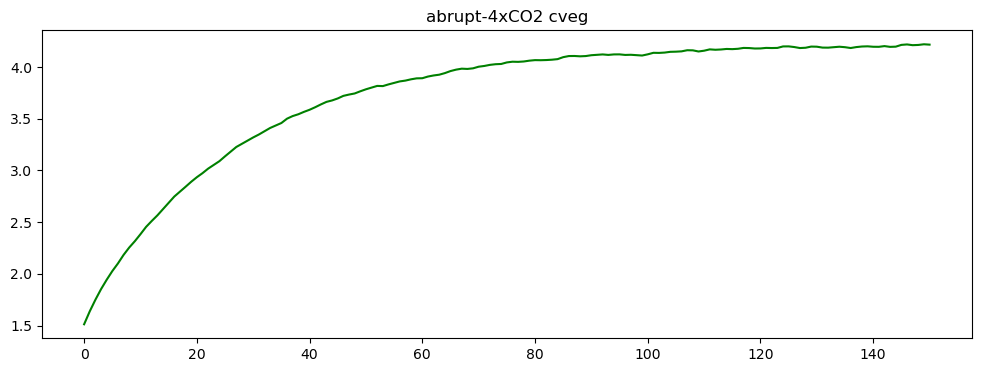

In [20]:
timeseries({
    "abrupt-4xCO2 gpp":"./gpp_Lmon_CanESM5_abrupt-4xCO2_r1i1p1f1_gn_185001-200012.nc",
    "abrupt-4xCO2 ts":"./ts_Amon_CanESM5_abrupt-4xCO2_r1i1p1f1_gn_185001-200012.nc",
    "abrupt-4xCO2 cveg":"./cVeg_Lmon_CanESM5_abrupt-4xCO2_r1i1p1f1_gn_185001-200012.nc",
})

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

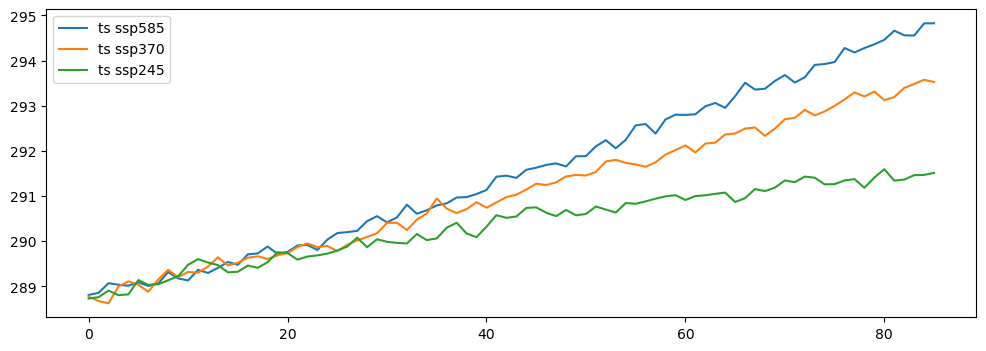

In [43]:
timeseries({
    "ts ssp585":"./ts_Amon_CanESM5_ssp585_r1i1p1f1_gn_201501-210012.nc",
    "ts ssp370":"./ts_Amon_CanESM5_ssp370_r1i1p1f1_gn_201501-210012.nc",
    "ts ssp245":"./ts_Amon_CanESM5_ssp245_r1i1p1f1_gn_201501-210012.nc",
}, combined=True)
